**Binary Classifications**

Random Forest Accuracy: 96.57%
SVM Accuracy: 97.29%


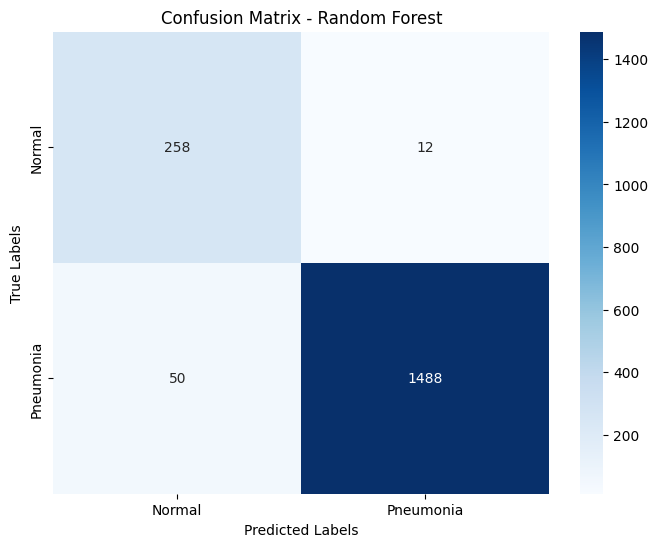

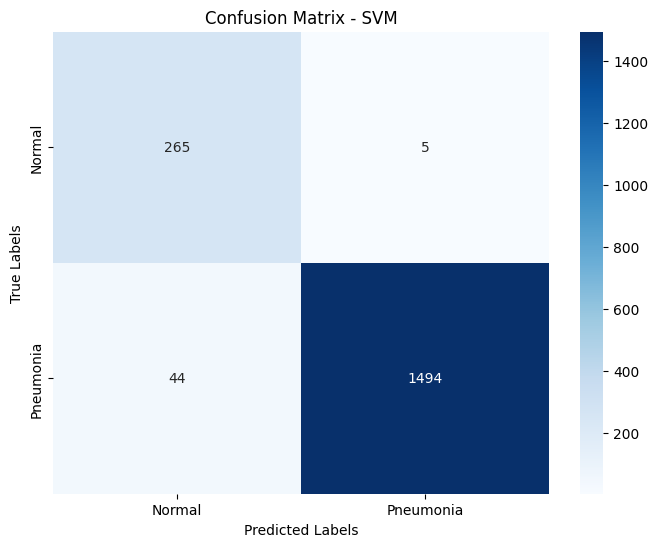

Random Forest Precision: 96.90%
Random Forest Recall: 96.57%
Random Forest F1 Score: 96.66%
SVM Precision: 97.59%
SVM Recall: 97.29%
SVM F1 Score: 97.36%


In [1]:
import cv2
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from skimage.feature import hog
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the train and test directories
train_dir = 'drive/MyDrive/PneumoniaDataset/Curated X-Ray Dataset/BinaryClassification/Normal_Pneumonia/train/'
test_dir = 'drive/MyDrive/PneumoniaDataset/Curated X-Ray Dataset/BinaryClassification/Normal_Pneumonia/test/'

# Function to extract HOG features from an image
def extract_hog_features(img):
    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Resize image
    resized_img = cv2.resize(gray_img, (128, 128))
    # Extract HOG features
    features, hog_image = hog(resized_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return features

# Function to load dataset and extract HOG features
def load_and_extract_features(data_dir):
    data = []
    labels = []
    for class_label in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_label)
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                hog_features = extract_hog_features(img)
                data.append(hog_features)
                labels.append(class_label)
    return np.array(data), np.array(labels)

# Load and extract features from training and test sets
train_data, train_labels = load_and_extract_features(train_dir)
test_data, test_labels = load_and_extract_features(test_dir)

# Encode labels
le = LabelEncoder()
train_labels_enc = le.fit_transform(train_labels)
test_labels_enc = le.transform(test_labels)

# Standardize the data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_data, train_labels_enc)

# Evaluate Random Forest
rf_predictions = rf_classifier.predict(test_data)
rf_accuracy = accuracy_score(test_labels_enc, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

# Train SVM classifier
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(train_data, train_labels_enc)

# Evaluate SVM
svm_predictions = svm_classifier.predict(test_data)
svm_accuracy = accuracy_score(test_labels_enc, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(test_labels_enc, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(test_labels_enc, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM')
plt.show()

# Performance metrics for Random Forest
rf_precision = precision_score(test_labels_enc, rf_predictions, average='weighted')
rf_recall = recall_score(test_labels_enc, rf_predictions, average='weighted')
rf_f1 = f1_score(test_labels_enc, rf_predictions, average='weighted')
print(f"Random Forest Precision: {rf_precision * 100:.2f}%")
print(f"Random Forest Recall: {rf_recall * 100:.2f}%")
print(f"Random Forest F1 Score: {rf_f1 * 100:.2f}%")

# Performance metrics for SVM
svm_precision = precision_score(test_labels_enc, svm_predictions, average='weighted')
svm_recall = recall_score(test_labels_enc, svm_predictions, average='weighted')
svm_f1 = f1_score(test_labels_enc, svm_predictions, average='weighted')
print(f"SVM Precision: {svm_precision * 100:.2f}%")
print(f"SVM Recall: {svm_recall * 100:.2f}%")
print(f"SVM F1 Score: {svm_f1 * 100:.2f}%")


**Binary between Bacteria vs Viral**

Random Forest Accuracy: 75.17%
SVM Accuracy: 66.06%


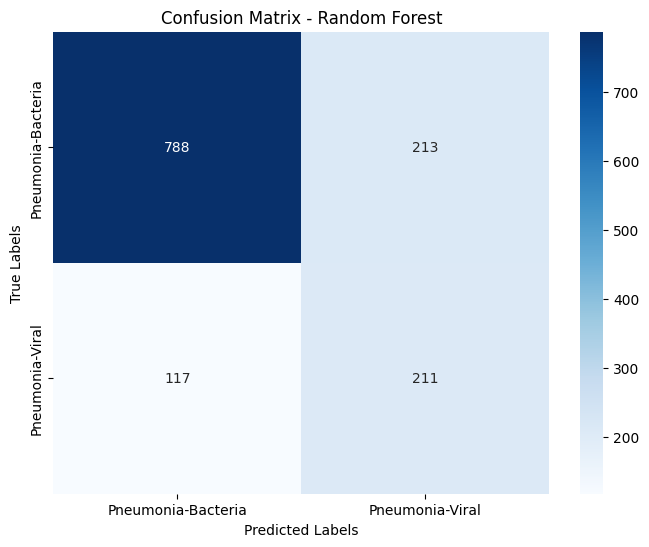

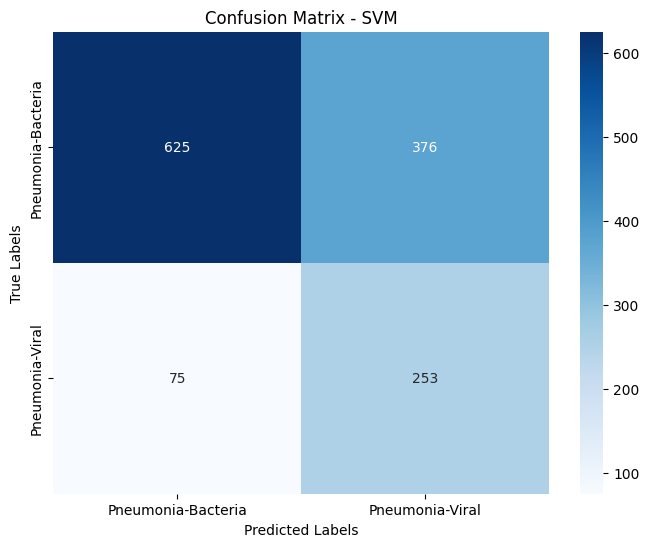

Random Forest Precision: 77.86%
Random Forest Recall: 75.17%
Random Forest F1 Score: 76.13%
SVM Precision: 77.18%
SVM Recall: 66.06%
SVM F1 Score: 68.40%


In [2]:
import cv2
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from skimage.feature import hog
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the train and test directories
train_dir = 'drive/MyDrive/PneumoniaDataset/Curated X-Ray Dataset/BinaryClassification/PneumoniaBacteria_PneumoniaViral/train/'
test_dir = 'drive/MyDrive/PneumoniaDataset/Curated X-Ray Dataset/BinaryClassification/PneumoniaBacteria_PneumoniaViral/test/'

# Function to extract HOG features from an image
def extract_hog_features(img):
    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Resize image
    resized_img = cv2.resize(gray_img, (128, 128))
    # Extract HOG features
    features, hog_image = hog(resized_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return features

# Function to load dataset and extract HOG features
def load_and_extract_features(data_dir):
    data = []
    labels = []
    for class_label in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_label)
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                hog_features = extract_hog_features(img)
                data.append(hog_features)
                labels.append(class_label)
    return np.array(data), np.array(labels)

# Load and extract features from training and test sets
train_data, train_labels = load_and_extract_features(train_dir)
test_data, test_labels = load_and_extract_features(test_dir)

# Encode labels
le = LabelEncoder()
train_labels_enc = le.fit_transform(train_labels)
test_labels_enc = le.transform(test_labels)

# Standardize the data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_data, train_labels_enc)

# Evaluate Random Forest
rf_predictions = rf_classifier.predict(test_data)
rf_accuracy = accuracy_score(test_labels_enc, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

# Train SVM classifier
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(train_data, train_labels_enc)

# Evaluate SVM
svm_predictions = svm_classifier.predict(test_data)
svm_accuracy = accuracy_score(test_labels_enc, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(test_labels_enc, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(test_labels_enc, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM')
plt.show()

# Performance metrics for Random Forest
rf_precision = precision_score(test_labels_enc, rf_predictions, average='weighted')
rf_recall = recall_score(test_labels_enc, rf_predictions, average='weighted')
rf_f1 = f1_score(test_labels_enc, rf_predictions, average='weighted')
print(f"Random Forest Precision: {rf_precision * 100:.2f}%")
print(f"Random Forest Recall: {rf_recall * 100:.2f}%")
print(f"Random Forest F1 Score: {rf_f1 * 100:.2f}%")

# Performance metrics for SVM
svm_precision = precision_score(test_labels_enc, svm_predictions, average='weighted')
svm_recall = recall_score(test_labels_enc, svm_predictions, average='weighted')
svm_f1 = f1_score(test_labels_enc, svm_predictions, average='weighted')
print(f"SVM Precision: {svm_precision * 100:.2f}%")
print(f"SVM Recall: {svm_recall * 100:.2f}%")
print(f"SVM F1 Score: {svm_f1 * 100:.2f}%")


**Multiclass Categorizations of Pneumonia: Covid-19, Bacteria and Viral**

In [ ]:
import cv2
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from skimage.feature import hog
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the train and test directories
train_dir = 'drive/MyDrive/PneumoniaDataset/Curated X-Ray Dataset/MultiClassClassification/PneumoniaClassesOnly/train/'
test_dir = 'drive/MyDrive/PneumoniaDataset/Curated X-Ray Dataset/MultiClassClassification/PneumoniaClassesOnly/test/'

# Function to extract HOG features from an image
def extract_hog_features(img):
    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Resize image
    resized_img = cv2.resize(gray_img, (128, 128))
    # Extract HOG features
    features, hog_image = hog(resized_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return features

# Function to load dataset and extract HOG features
def load_and_extract_features(data_dir):
    data = []
    labels = []
    for class_label in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_label)
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                hog_features = extract_hog_features(img)
                data.append(hog_features)
                labels.append(class_label)
    return np.array(data), np.array(labels)

# Load and extract features from training and test sets
train_data, train_labels = load_and_extract_features(train_dir)
test_data, test_labels = load_and_extract_features(test_dir)

# Encode labels
le = LabelEncoder()
train_labels_enc = le.fit_transform(train_labels)
test_labels_enc = le.transform(test_labels)

# Standardize the data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_data, train_labels_enc)

# Evaluate Random Forest
rf_predictions = rf_classifier.predict(test_data)
rf_accuracy = accuracy_score(test_labels_enc, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

# Train SVM classifier
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(train_data, train_labels_enc)

# Evaluate SVM
svm_predictions = svm_classifier.predict(test_data)
svm_accuracy = accuracy_score(test_labels_enc, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(test_labels_enc, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(test_labels_enc, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM')
plt.show()

# Performance metrics for Random Forest
rf_precision = precision_score(test_labels_enc, rf_predictions, average='weighted')
rf_recall = recall_score(test_labels_enc, rf_predictions, average='weighted')
rf_f1 = f1_score(test_labels_enc, rf_predictions, average='weighted')
print(f"Random Forest Precision: {rf_precision * 100:.2f}%")
print(f"Random Forest Recall: {rf_recall * 100:.2f}%")
print(f"Random Forest F1 Score: {rf_f1 * 100:.2f}%")

# Performance metrics for SVM
svm_precision = precision_score(test_labels_enc, svm_predictions, average='weighted')
svm_recall = recall_score(test_labels_enc, svm_predictions, average='weighted')
svm_f1 = f1_score(test_labels_enc, svm_predictions, average='weighted')
print(f"SVM Precision: {svm_precision * 100:.2f}%")
print(f"SVM Recall: {svm_recall * 100:.2f}%")
print(f"SVM F1 Score: {svm_f1 * 100:.2f}%")
